In [1]:
from datetime import date, datetime

import pandas as pd
import seaborn as sns

In [2]:
# decide the date range for the data, lets do two years
from_date = "2022-07-11"
to_date = "2024-07-11"

In [3]:
day_ahead_price = pd.read_csv("../../data/processed/day_ahead_price.csv", decimal=",", header=0, sep=";")

In [4]:
day_ahead_price = day_ahead_price[day_ahead_price["ds"].between(from_date, to_date)]
day_ahead_price.reset_index(drop=True, inplace=True)
day_ahead_price.reset_index(inplace=True)

In [5]:
day_ahead_price[day_ahead_price["price"].isna()]

,index,ds,price


In [6]:
day_ahead_price.tail()

,index,ds,price
17539,17539,2024-07-10 19:00:00,99.72
17540,17540,2024-07-10 20:00:00,148.61
17541,17541,2024-07-10 21:00:00,164.08
17542,17542,2024-07-10 22:00:00,113.97
17543,17543,2024-07-10 23:00:00,92.92


<Axes: xlabel='index', ylabel='price'>

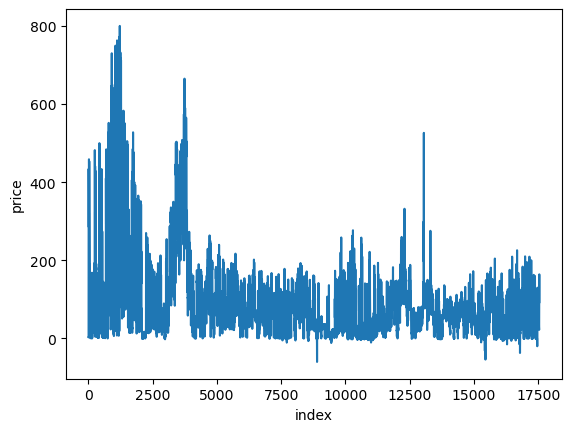

In [9]:
sns.lineplot(data=day_ahead_price, x="index", y="price")

<Axes: xlabel='index', ylabel='price'>

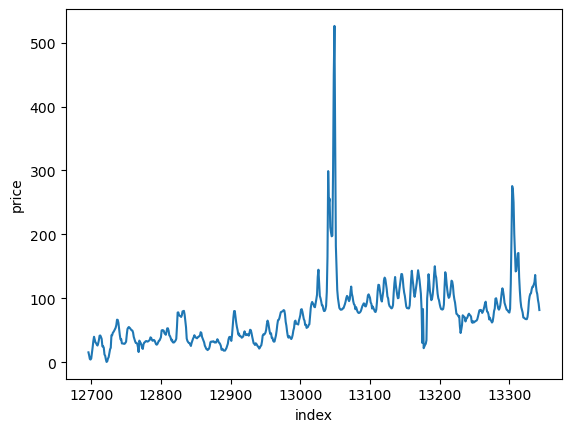

In [12]:
# We see a couple of spikes in price in this date interval. A quick look online at hourly
# temperatures in southern Sweden at these dates shows some extremely low temperatures roughly
# around the spikes. This supports the idea that temperature forecasts is a good predictor of
# electricity prices. We shall see during the modelling evaluation phase if this is true.
sns.lineplot(data=day_ahead_price[day_ahead_price["ds"].between("2023-12-22", "2024-01-18")], x="index", y="price")

In [15]:
temperature = pd.read_csv("../../data/processed/temperature.csv", decimal=",", header=0, sep=";")
temperature = temperature[temperature["ds"].between(from_date, to_date)]
temperature.reset_index(drop=True, inplace=True)
temperature.reset_index(inplace=True)

In [14]:
temperature.tail()

NameError: name 'temperature' is not defined

In [19]:
temperature[temperature["temperature"].isna()]

,index,date,hour,temperature


<Axes: xlabel='index', ylabel='temperature'>

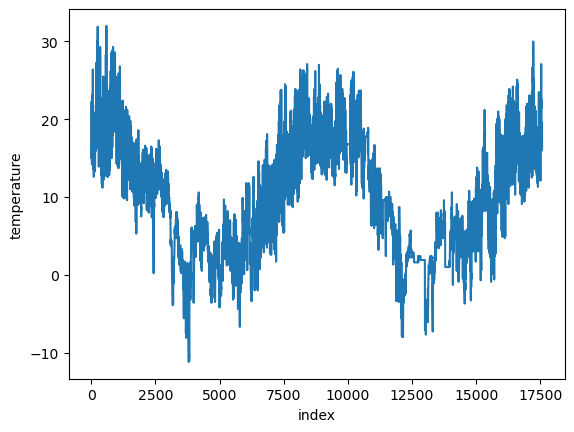

In [20]:
sns.lineplot(data=temperature, x="index", y="temperature")

<Axes: xlabel='index', ylabel='temperature'>

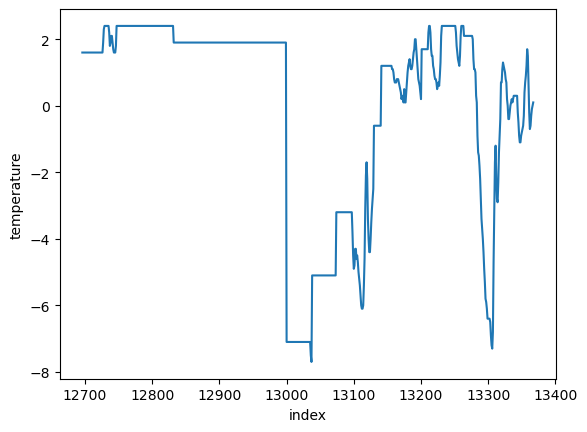

In [ ]:
sns.lineplot(data=temperature[temperature["ds"].between("2023-12-22", "2024-01-18")], x="index", y="temperature")

In [22]:
len(day_ahead_price) == len(temperature)

True